Preprocessing for cancer vs healthy

Import operating system, numpy, pandas, matplotlib, statsmodels libraries

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib as mp 
import statsmodels.api as sm 
import random

Set seed to ensure reproducability

In [27]:
random.seed(123)

Read training data and visualise data

In [28]:
trainp_data = pd.read_csv('Train_Set.csv')
testp_data = pd.read_csv('Test_Set.csv')
print(trainp_data.head(5)) # information on first five data points
print(testp_data.head(5)) # information on first five data points
print(trainp_data.shape) # dimensions of train data set
print(testp_data.shape) # dimensions of test data set
print(trainp_data.describe()) # statistical information on train data set
print(testp_data.describe()) # statistical information on test data set


   length_51  length_52  length_53  length_54  length_55  length_56  \
0   0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1   0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2   0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3   0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4   0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   

   length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0   0.000122   0.000115   0.000151   0.000167  ...    0.007396    0.007193   
1   0.007748   0.008088   0.008671   0.008835  ...    0.017830    0.017033   
2   0.004960   0.005605   0.005919   0.006480  ...    0.010957    0.010481   
3   0.005475   0.006158   0.007174   0.007697  ...    0.010032    0.008933   
4   0.013024   0.014853   0.016874   0.017501  ...    0.009118    0.008535   

   length_394  length_395  length_396  length_397  length_398  length_399  \
0    0.006973    0.006481  

Check for missing data points

In [29]:
print(trainp_data.isna().sum()) # check how many data points missing
print(trainp_data.iloc[:, -1]) # view response variable (status of cancer)
print(trainp_data['class_label'].value_counts()) # distribution of response variable (status of cancer)

length_51      0
length_52      0
length_53      0
length_54      0
length_55      0
              ..
length_397     0
length_398     0
length_399     0
length_400     0
class_label    0
Length: 351, dtype: int64
0                  healthy
1                  healthy
2                  healthy
3                  healthy
4                  healthy
               ...        
2188    early stage cancer
2189    early stage cancer
2190    early stage cancer
2191    early stage cancer
2192    early stage cancer
Name: class_label, Length: 2193, dtype: object
class_label
early stage cancer        781
screening stage cancer    490
mid stage cancer          453
late stage cancer         409
healthy                    60
Name: count, dtype: int64


Merge different cancer classes together into cancer class

In [30]:
classes_to_merge = ['late stage cancer', 'mid stage cancer', 'screening stage cancer', 'early stage cancer'] # selecting cancer stages to merge
new_class_label = "cancer" # new label
trainp_data['class_label'] = trainp_data['class_label'].replace(classes_to_merge, new_class_label) # merge classes
print(trainp_data['class_label'].value_counts()) 

class_label
cancer     2133
healthy      60
Name: count, dtype: int64


Initialise x and y variables 

In [31]:
xvals = trainp_data.iloc[:, 0:350] # access train x values
yvals = trainp_data.iloc[:,350] # access train y values
xvals_train = testp_data.iloc[:, 0:350] # access test x values
yvals_train = testp_data.iloc[:, 350] # access test x values

Standardising x values

In [32]:
from sklearn.preprocessing import StandardScaler 
std_x = StandardScaler() # initialise StandardScaler
x_std = std_x.fit_transform(xvals) # standardise x values

Technique to remove regressors:

Perform logistic regression to identify insignifcant regressors based on p value

In [33]:
yvals_binary = yvals.map({'cancer': 1, 'healthy': 0}) # Convert "cancer" to 1 and "healthy" to 0
print(yvals_binary.unique()) 
logit_model = sm.Logit(yvals_binary, x_std) # carry out logistic regression
result = logit_model.fit()
p_values = result.pvalues # obtain p values of regressor features in model
significant_features_1 = list(p_values[p_values < 0.05].index.tolist()) # Filter out significant features with p-value < 0.05
insignificant_features_1 = list(p_values[p_values > 0.05].index.tolist()) # Filter out insignificant features with p-value > 0.05
print(len(insignificant_features_1) + len(significant_features_1))
print(insignificant_features_1)


[0 1]
Optimization terminated successfully.
         Current function value: 0.686134
         Iterations 6
350
['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x1

Perform L1 (lasso) regularisation to logistic regression model to idenitify insignifcant regressors with coefficients equals to zero

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')  # specify solver for L1 regularization
log_reg_l1.fit(x_std, yvals_binary)  # train model
significant_features_2 = list(xvals.columns[log_reg_l1.coef_[0] != 0]) # check if there are any signifcant features identified
insignificant_features_2 = list(xvals.columns[log_reg_l1.coef_[0] == 0]) # identify insignifcant features
print(len(insignificant_features_2) + len(significant_features_2))
print(insignificant_features_2)

350
['length_51', 'length_52', 'length_53', 'length_54', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'lengt

Perform principal component analysis to identify insignifcant regressors that contribute little to variance

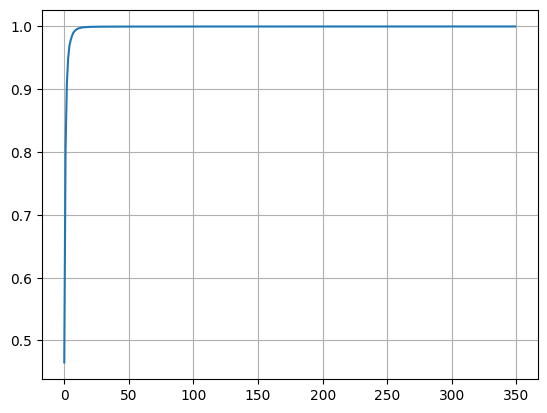

In [35]:
from sklearn.decomposition import PCA 
pca = PCA() # initialise PCA with default parameters
x_pca = pca.fit_transform(x_std) # compute principal components and transforms data into new feature space
explained_variance_ratio = pca.explained_variance_ratio_  # Get explained variance ratio for each component
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio) # sum computed variance for certain number of components
import matplotlib.pyplot as plt
plt.plot(cumulative_explained_variance_ratio) # plot cumulative explained variance ratio
plt.grid(True) # add grid to the plot
plt.show() # show graph

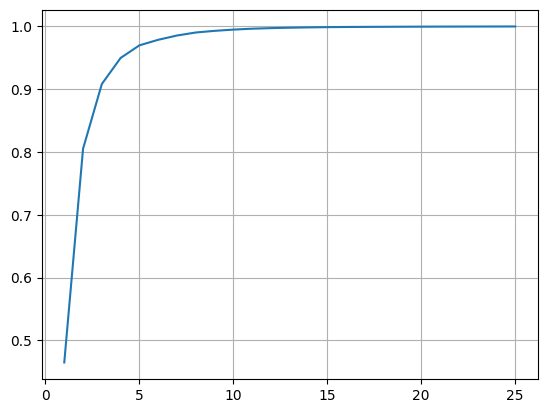

In [36]:
chosen_num_components = 25  # plateu cannot be read accurately so limit x axis to [0,25] and plot again
plt.plot(range(1, chosen_num_components + 1), cumulative_explained_variance_ratio[:chosen_num_components])
plt.grid(True) # add grid to the plot
plt.show() # plateu can be read 

In [37]:
chosen_num_components = 5 # there is little to no change in cumulative variance when more than 5 principal components are involved in calculations
pca = PCA(n_components = chosen_num_components) # initialise new pca with no of components = 5
x_pca = pca.fit_transform(x_std) # compute principal components and transforms data into new feature space

In [38]:
original_features = xvals.columns # all features
significant_feature_indices = np.where(cumulative_explained_variance_ratio <= 0.95)[0] # identify festures that are responsible for 95 oercent of variance
significant_features_3 = list(original_features[significant_feature_indices])
insignificant_feature_indices = np.where(cumulative_explained_variance_ratio > 0.95)[0]
insignificant_features_3 = list(original_features[insignificant_feature_indices])
print(len(insignificant_features_3) + len(significant_features_3))
print(insignificant_features_3)

350
['length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'length_127', 'length_128', 'len

Perform correlation analysis to identify insignifcant regressors that are are highly correlated

In [39]:
correlation_matrix = xvals.corr() # find correlation coefficients between each pair of variables
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # mask to consider only the upper triangular matrix and ignore correlation between the same variable. Output is true and false
correlation_matrix = correlation_matrix.mask(mask) # apply mask to correlation matrix
significant_features_4 = list(xvals.columns)
insignificant_features_4 = []

In [40]:
for i in range(len(correlation_matrix.columns)): # Loop through the columnns
    for j in range(i): # Loop through the rows
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed. Set 0.8 here
            colname_i = correlation_matrix.columns[i] # first compared feature
            colname_j = correlation_matrix.columns[j] # second compared feature
            if colname_i in significant_features_4:
                significant_features_4.remove(colname_i) # update the significant features
            if colname_i not in insignificant_features_4:
                insignificant_features_4.append(colname_i) # update the siugnifcant features

print(len(insignificant_features_4) + len(significant_features_4))
print(insignificant_features_4)

350
['length_52', 'length_53', 'length_54', 'length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length

Decide which features to remove

Check lengths of features to be removed

In [41]:

removables = {}

def update_to_remove(insignificant_features):
    for feature in insignificant_features:
        if feature not in removables:
            removables[feature] = 0
        removables[feature] += 1
    return removables

update_to_remove(insignificant_features_1)
update_to_remove(insignificant_features_2)
update_to_remove(insignificant_features_3)
update_to_remove(insignificant_features_4)

{'x1': 1,
 'x2': 1,
 'x3': 1,
 'x4': 1,
 'x5': 1,
 'x6': 1,
 'x7': 1,
 'x8': 1,
 'x9': 1,
 'x10': 1,
 'x11': 1,
 'x12': 1,
 'x13': 1,
 'x14': 1,
 'x15': 1,
 'x16': 1,
 'x17': 1,
 'x18': 1,
 'x19': 1,
 'x20': 1,
 'x21': 1,
 'x22': 1,
 'x23': 1,
 'x24': 1,
 'x25': 1,
 'x26': 1,
 'x27': 1,
 'x28': 1,
 'x29': 1,
 'x30': 1,
 'x31': 1,
 'x32': 1,
 'x33': 1,
 'x34': 1,
 'x35': 1,
 'x36': 1,
 'x37': 1,
 'x38': 1,
 'x39': 1,
 'x40': 1,
 'x41': 1,
 'x42': 1,
 'x43': 1,
 'x44': 1,
 'x45': 1,
 'x46': 1,
 'x47': 1,
 'x48': 1,
 'x49': 1,
 'x50': 1,
 'x51': 1,
 'x52': 1,
 'x53': 1,
 'x54': 1,
 'x55': 1,
 'x56': 1,
 'x57': 1,
 'x58': 1,
 'x59': 1,
 'x60': 1,
 'x61': 1,
 'x62': 1,
 'x63': 1,
 'x64': 1,
 'x65': 1,
 'x66': 1,
 'x67': 1,
 'x68': 1,
 'x69': 1,
 'x70': 1,
 'x71': 1,
 'x72': 1,
 'x73': 1,
 'x74': 1,
 'x75': 1,
 'x76': 1,
 'x77': 1,
 'x78': 1,
 'x79': 1,
 'x80': 1,
 'x81': 1,
 'x82': 1,
 'x83': 1,
 'x84': 1,
 'x85': 1,
 'x86': 1,
 'x87': 1,
 'x88': 1,
 'x89': 1,
 'x90': 1,
 'x91': 1,
 'x92': 

Find how many appearences the features appear in insiginficant features


In [42]:
drops_2 = []
drops_3 = []
drops_4 = []

for feature in removables:
    if removables[feature] >= 2:
        drops_2.append(feature)
    if removables[feature] >= 3:
        drops_3.append(feature)
    if removables[feature] >= 4:
        drops_4.append(feature)

print(len(drops_2)) # 348 variables removed # 2 variables preserved
print(len(drops_3)) # 330 variables removed # 20 variables preserved, Most optimal number of features to be preserved
print(len(drops_4)) # 0 variables remnoved # 350 variables preserved 

348
330
0


Update data set by removing features in drop 3

In [43]:
### features in drops3 removed from test data set
xvals_filtered = xvals.drop(columns=drops_3)
print(xvals_filtered.shape)

### features in drops3 removed from train data set
xvals_train_filtered = xvals_train.drop(columns=drops_3)
print(xvals_train_filtered.shape)

# xvals_filtered to be used as dependent variables used to build the model
# yvals to be used as the response variable used to build the model

# xvals_train_filtered to be used as dependent variables used to build the model
# yvals_train to be used as the response variable used to build the model




(2193, 20)
(1034, 20)


In [44]:
print(yvals_train)

0                 healthy
1                 healthy
2                 healthy
3                 healthy
4                 healthy
              ...        
1029    late stage cancer
1030    late stage cancer
1031    late stage cancer
1032    late stage cancer
1033    late stage cancer
Name: class_label, Length: 1034, dtype: object
